# IWIS - Test task

## Description:
- Given a train and test datastes - build a binary classififer which will predict whether or not a client's loan will be aproved or declined

- Data:
    - 9 anonimized features
    - Binary target - {1:loan declined, 0: loan aproved}
    
- Metrics:
    - ROC_AUC
    - Precision/Recall/F1

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

# set options
pd.options.display.max_rows = 150
pd.options.display.max_columns = None
plt.style.use('classic')
filterwarnings('ignore')

%matplotlib inline

In [2]:
!head data/train.csv 

feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
0.0019632670000000003,42,0,0.079940785,1350,7,0,0,0,0,0
0.004538287,86,0,3.0, ,2,0,0,0, ,0
0.023044317,61,0,0.41991601700000003,5000,18,0,2,0,1,0
0.12124203300000001,48,0,0.526589364,2500,12,0,1,0,1,0
0.9999998999999999,49,3,0.256566684,5900,3,3,1,1,2,1
0.11378862099999999,68,1,0.005097373,7650,2,0,0,0,1,0
0.25476362399999997,39,0,0.360161138,11666,7,0,1,0,1,0
0.8725149659999999,47,0,2817.0, ,8,0,1,0,2,0
0.33855517,71,0,0.39728506799999996,14364,12,0,2,0,0,0


In [3]:
# set paths constants
PATH_TRAIN = 'data/train.csv'
PATH_TEST = 'data/test.csv'

### Get familiar with data
- load data
- calculate some stats
- check for nulls/duplicates
- check target distribution

In [4]:
# load data
df_train = pd.read_csv(PATH_TRAIN)

In [5]:
# check first 5 rows
df_train.head()

,feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
0,0.001963,42,0,0.079941,1350,7,0,0,0,0,0
1,0.004538,86,0,3.000000,,2,0,0,0,,0
2,0.023044,61,0,0.419916,5000,18,0,2,0,1,0
3,0.121242,48,0,0.526589,2500,12,0,1,0,1,0
4,1.000000,49,3,0.256567,5900,3,3,1,1,2,1


In [6]:
# check dtypes and null counts if exists
df_train.info(memory_usage = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73276 entries, 0 to 73275
Data columns (total 11 columns):
feature1    73276 non-null float64
age         73276 non-null int64
feature2    73276 non-null int64
feature3    73276 non-null float64
feature4    73276 non-null object
feature5    73276 non-null int64
feature6    73276 non-null int64
feature7    73276 non-null int64
feature8    73276 non-null int64
feature9    73276 non-null object
target      73276 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 6.1+ MB


In [7]:
# check if there is duplicated rows
df_train.duplicated().sum()

479

In [8]:
# show some statistics
df_train.describe(include = 'all')

,feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
count,73276.000000,73276.000000,73276.000000,73276.000000,73276,73276.000000,73276.000000,73276.000000,73276.000000,73276,73276.000000
unique,NaN,NaN,NaN,NaN,9729,NaN,NaN,NaN,NaN,6,NaN
top,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,NaN,NaN,14462,NaN,NaN,NaN,NaN,42390,NaN
mean,0.319472,52.465910,0.246384,332.632474,NaN,8.459891,0.087109,0.992808,0.062381,NaN,0.066789
std,0.349851,14.423889,0.664956,1070.591318,NaN,4.866809,0.405338,0.985498,0.288855,NaN,0.249657
min,0.000000,29.000000,0.000000,0.004329,NaN,2.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.029748,41.000000,0.000000,0.174224,NaN,5.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,0.153913,52.000000,0.000000,0.364076,NaN,8.000000,0.000000,1.000000,0.000000,NaN,0.000000
75%,0.559585,63.000000,0.000000,0.857081,NaN,11.000000,0.000000,2.000000,0.000000,NaN,0.000000


In [9]:
# try to highlight categorical features based on number of unique occurencies in each feature 
# feature2, feature5, feature6, feature7, feature8, feature9 will be considered as categorical
df_train.nunique(axis = 0)

feature1    60592
age            59
feature2        5
feature3    57159
feature4     9729
feature5       23
feature6        4
feature7        5
feature8        3
feature9        6
target          2
dtype: int64

In [10]:
# value counts for categorical features - feature2
df_train['feature2'].value_counts()

0    61489
1     7904
2     2245
3      892
4      746
Name: feature2, dtype: int64

In [11]:
# value counts for categorical features - feature2
df_train['feature5'].value_counts()

6     6612
7     6435
5     6385
2     6320
8     6069
4     5686
9     5535
10    4735
3     4458
11    4057
12    3403
13    2756
14    2266
15    1793
16    1508
17    1110
18     949
24     911
19     683
20     603
21     407
22     333
23     262
Name: feature5, dtype: int64

In [12]:
#value counts for categorical features - feature6
df_train['feature6'].value_counts()

0    69221
1     2505
3      778
2      772
Name: feature6, dtype: int64

In [13]:
#value counts for categorical features - feature7
df_train['feature7'].value_counts()

0    27387
1    25669
2    15401
3     2998
4     1821
Name: feature7, dtype: int64

In [14]:
#value counts for categorical features - feature8
df_train['feature8'].value_counts()

0    69619
1     2743
2      914
Name: feature8, dtype: int64

In [15]:
#value counts for categorical features - feature9
df_train['feature9'].value_counts() ## <<< ' ' as null

0    42390
1    13003
2     9537
3     4606
      1900
4     1840
Name: feature9, dtype: int64

In [16]:
# null == ' '
(df_train == ' ').sum()

feature1        0
age             0
feature2        0
feature3        0
feature4    14462
feature5        0
feature6        0
feature7        0
feature8        0
feature9     1900
target          0
dtype: int64

In [17]:
# set ' ' >- np.nan for further imputation
df_train.replace(' ', np.nan, inplace = True)

In [18]:
# check for target distribution
df_train.target.value_counts(normalize = True)

0    0.933211
1    0.066789
Name: target, dtype: float64

## Primary insights
- so there is 73276 object, not 9 but 10 features (9 anonimized and **age feature**) and **binary target**.
- there are **479 duplicated rows** 
- primary .info() **doesn't found any null values**, but:
    - feature9 has object type + ' ' elements in it. ' ' will be considered as null in this case
    - there is 14462 nulls in feature 4 and 1900 nulls in feature9
- there is some **issues with types of features**, which must be recasted to proper type.
- features have **different scales**, so in case of usage of classifiers based on linear (e.g. SVM(linear kernel)/LG) or distance (e.g. KNN) methods - features must be scaled to the same distribution:
    - feature1 is already minmax scaled
    - feature4 must be cleaned and scaled in some cases
- based on target distribution  6% of clients received decline on their loan - this is **imbalanced-classification** problem so additional methods of over/under-sampling technique like SMOTE may be applied in case of classifier's improvement
- I found out that there is **6 categorical features** (some of them may be ranked features) and 4 numerical feature

#### Type casting

In [19]:
# typecast
cat_features = [
    'feature2',
    'feature5',
    'feature6',
    'feature7',
    'feature8',
    'feature9'
]

num_features = [i for i in set(df_train.columns) - set(cat_features) if 'target' != i]
# convert to category 
df_train[cat_features] = df_train[cat_features].astype('category')
df_train[num_features] = df_train[num_features].apply(pd.to_numeric, errors = 'ignore',downcast = 'float')

# Exploratory Data Analysis

In [20]:
# for numerical feature's plots
def plot_num_ecdf(df, feature_col, class_target_col, colors = ['blue','red']):
    
    def ecdf(array):
        N = len(array)
        x_s = np.sort(array)
        y = np.arange(1, N+1) / N
        return (x_s, y)
    
    classes = df[class_target_col].unique()
    colors = colors
    
    fig, axes = plt.subplots(1,2,figsize = (15,5))
    
    # ax1
    sns.boxplot(df[feature_col],ax = axes[0],orient='v')
    axes[0].grid(alpha = 0.3)
    
    # ax2
    for each, color in zip(classes, colors):
        class_i = df[class_target_col] == each
        feature_class_i = df[class_i][feature_col]
        median_feature_i_class_i_ = feature_class_i.median()

        x,y = ecdf(feature_class_i)

        axes[1].axvline(median_feature_i_class_i_, 0.,1, alpha = 0.7, c = color,ls='--',label = f'Target = {each}, Median')
        axes[1].plot(x,
                     y,
                    label = f'Target={each}',
                    color = color
                    )

        axes[1].legend(loc = 'best')
        axes[1].grid(alpha = 0.3)
        axes[1].set_xlabel(f'X = {feature_col}')
        axes[1].set_ylabel('ecdf')
        
    fig.suptitle(f'Distribution analysis of {feature_col}',x = 0.5, y = 1.07, fontsize = 13)
    fig.tight_layout()
    
    
def plot_cat_features(df, feat_cat_col, target, normalize = True):

    # init figs
    fig,ax = plt.subplots(1,2, figsize = (17,4))

    # counts by feature class
    sns.countplot(df[feat_cat_col],ax = ax[0], palette='RdBu_r',alpha = 1,label = 'groups')

    # for split by target
    pd.crosstab(
        df_train[feat_cat_col],
        df_train['target'],
        df_train['target'],
        aggfunc='count',
        normalize = 'index'
    ).plot(kind='bar',cmap='RdBu_r',alpha = 1,ax = ax[1])

    # set fig params
    for i in ax:
        i.set_xlabel(f'X = {feat_cat_col}')
        i.legend(loc = 'best')
        i.grid(alpha = 0.3)

    ax[0].set_ylabel('# of occurencies')
    ax[1].set_ylabel('Ratio, %')

    fig.suptitle(f'Distribution analysis of {feat_cat_col}',y = 1.07, fontsize = 13)
    fig.tight_layout()
        
        

#### Target distribution

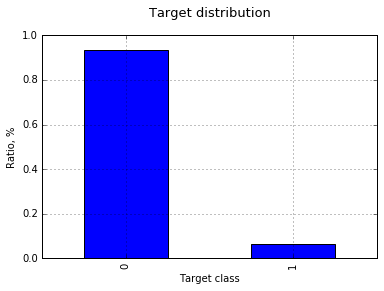

In [21]:
# class distribution
fig = plt.subplot(111)
df_train['target'].value_counts(normalize = True).plot(
    kind = 'bar',ax = fig)
fig.grid(0.5)
fig.set_xlabel('Target class')
fig.set_ylabel('Ratio, %')
fig.set_title('Target distribution',y = 1.06, fontsize = 13)
plt.show()

#### Numerical features

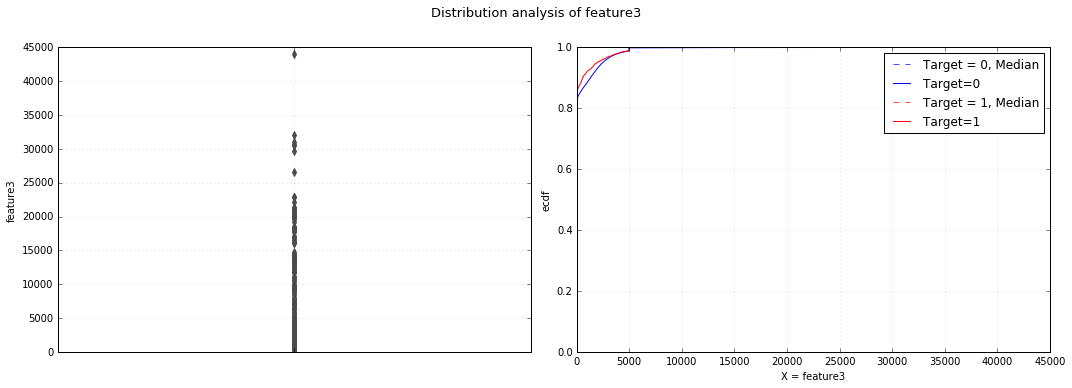

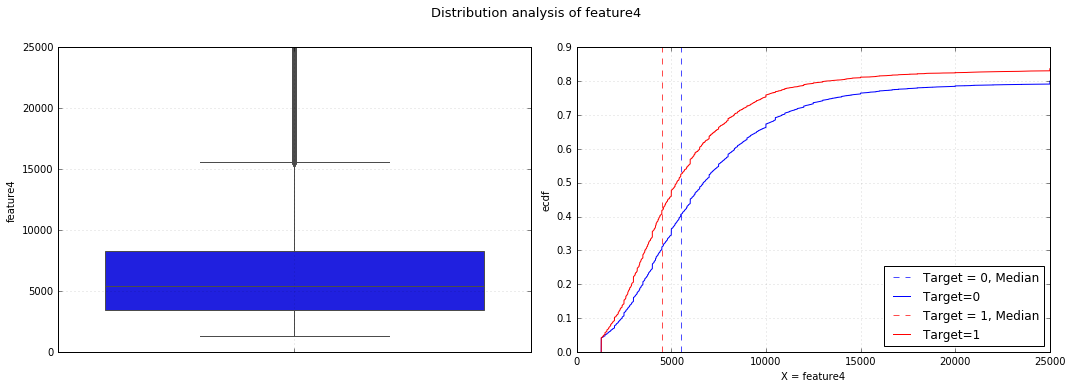

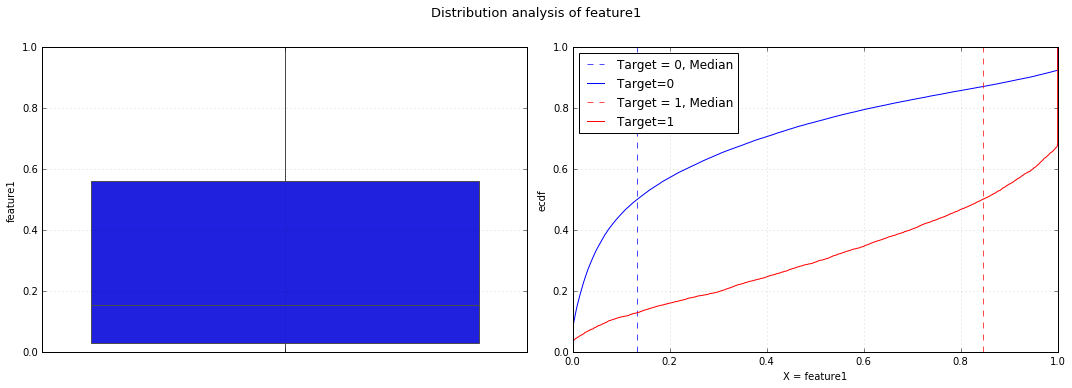

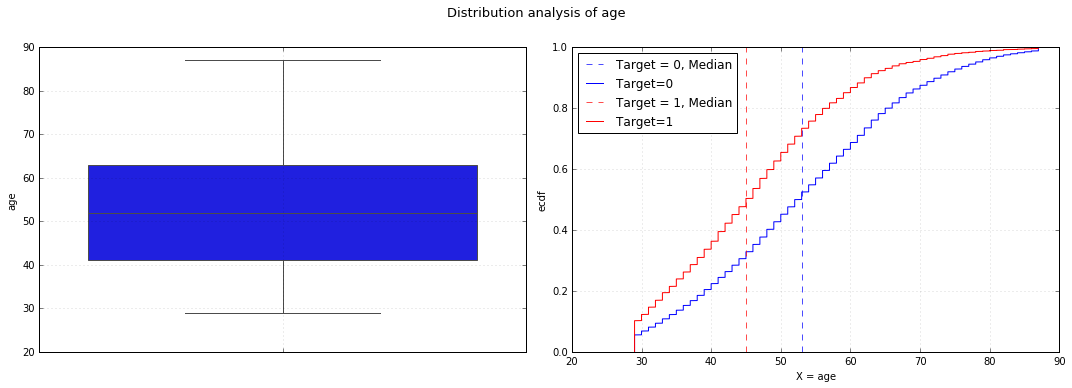

In [22]:
# numerical features distribution analysis
for each in num_features:
    plot_num_ecdf(df_train, each, 'target')

### Fixing feature 3
According to feature'3 chart above - this feature has a weird distribtuion. It looks like some values are scaled, with MinMax scaling technique, but another part - don't. We can fix this issue by getting scaling parametrs from part with non scaled values and apply those to inverse transform scaled part.

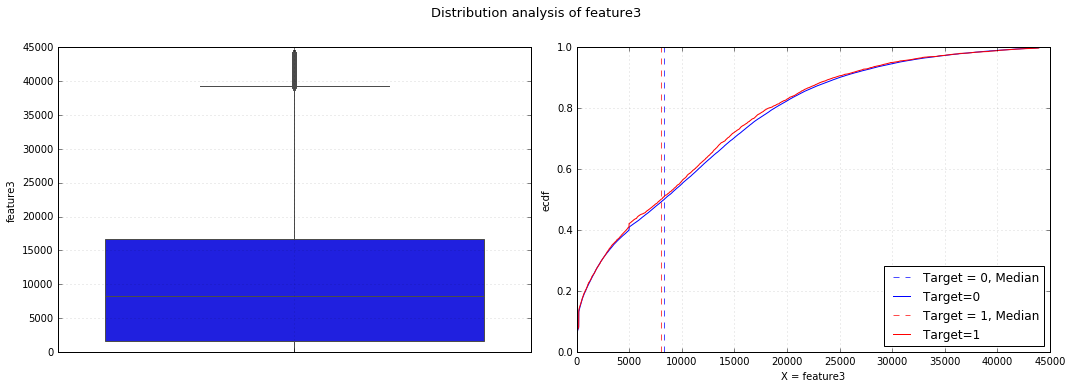

In [23]:
def fix_feature3(dataframe):
    non_standarterized_vals = dataframe.query('feature3 > 1')['feature3'].values.reshape(-2, 1)
    standarterized_vals = dataframe.query('feature3 <= 1')['feature3'].values.reshape(-2, 1)
    
    from sklearn.preprocessing import MinMaxScaler
    mmscaler = MinMaxScaler()
    mmscaler.fit(non_standarterized_vals)
    
    standarterized_to_initial = mmscaler.inverse_transform(standarterized_vals).reshape(-1)
    
    combine_arrays = np.concatenate([non_standarterized_vals.reshape(-1), standarterized_to_initial]).reshape(-2,1)
    
    #transformed = mmscaler.fit_transform(combine_arrays).reshape(-1)
    
    return combine_arrays

df_train['feature3'] = fix_feature3(df_train)

plot_num_ecdf(df_train, 'feature3', 'target')

Its look like this values are very similar to monthly income. But on exploration step this feature non-informative.

#### Categorical features

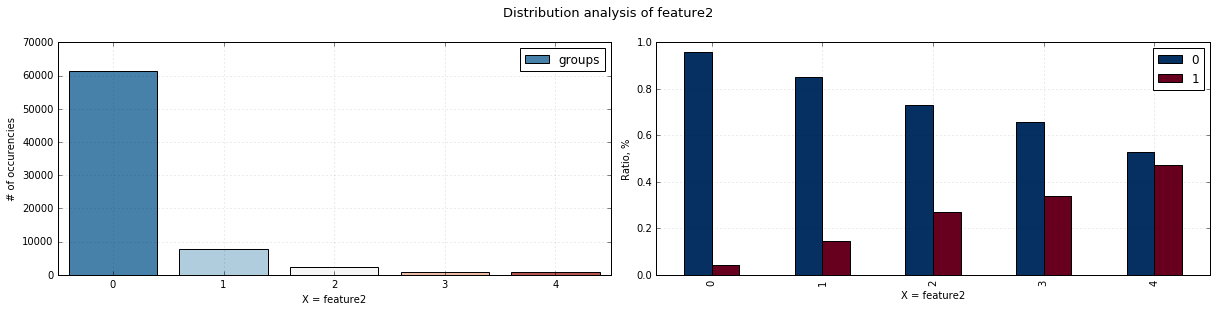

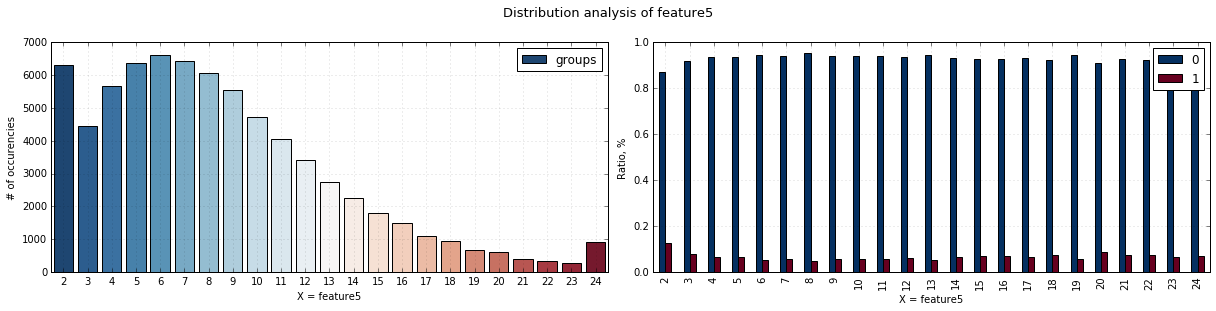

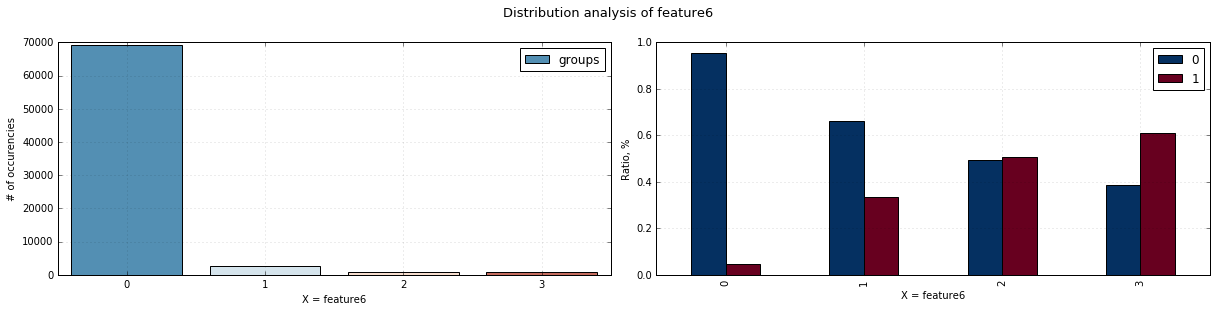

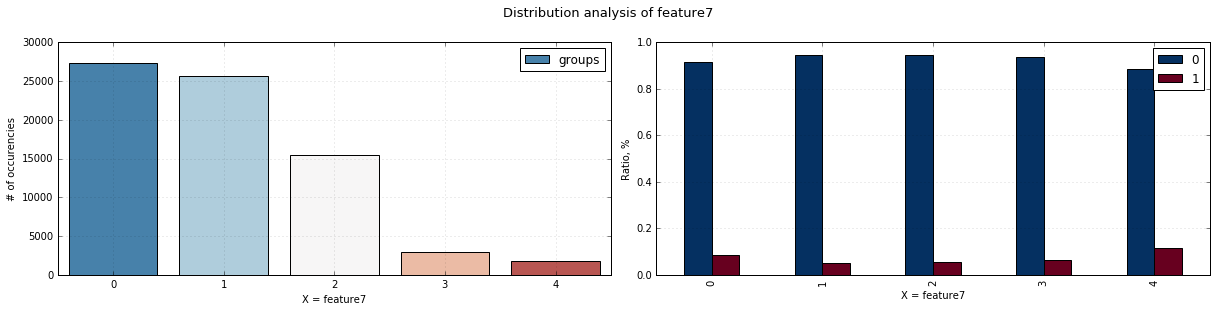

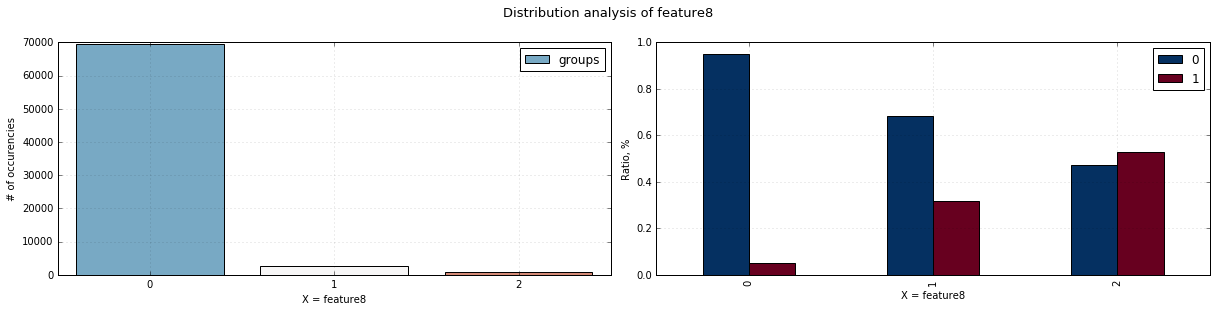

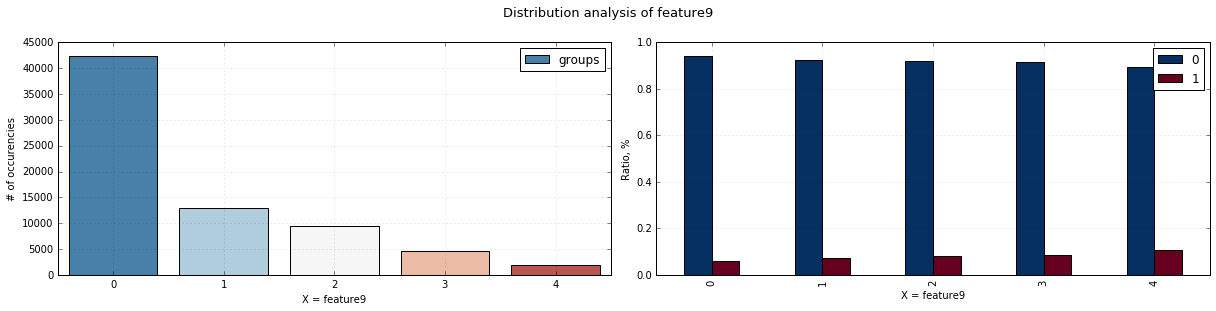

In [24]:
for i in cat_features:
    plot_cat_features(df_train, i, 'target')

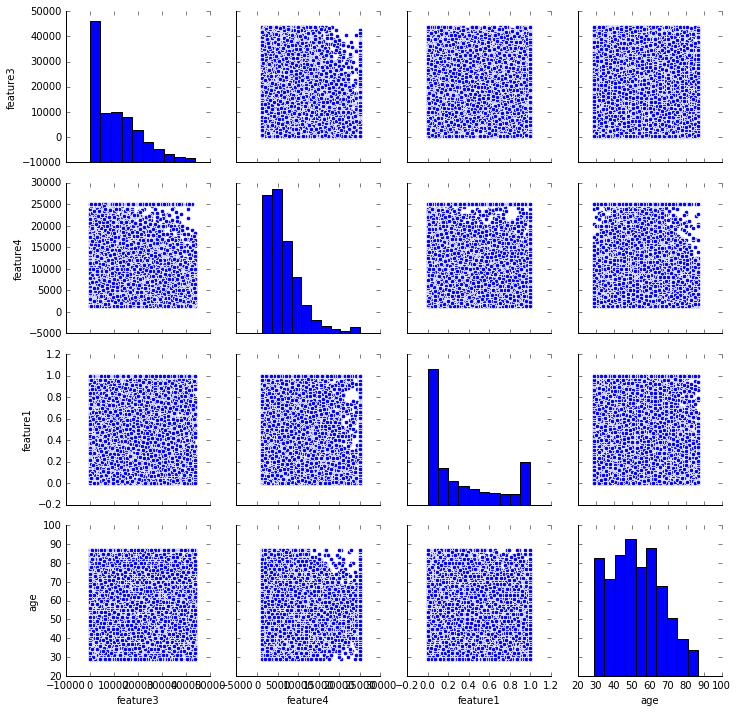

In [25]:
## Collinearity check
sns.pairplot(df_train[num_features])

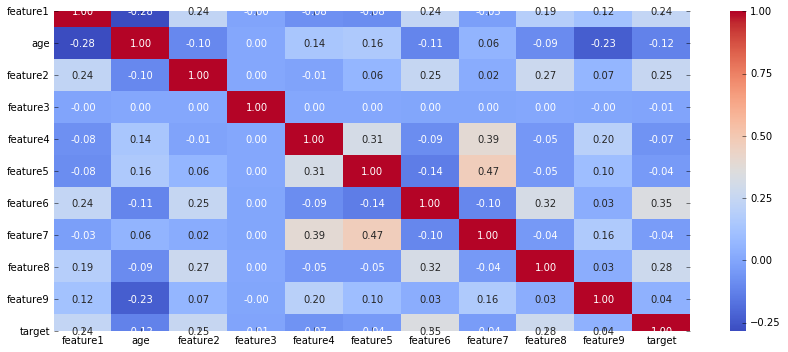

In [26]:
# check correlations
corr_matrix = df_train.apply(pd.to_numeric,errors='ignore').corr(method='spearman')
f,ax = plt.subplots(1,1,figsize = (12, 5))
sns.heatmap(corr_matrix,
            cmap = 'coolwarm',
            annot=True,
            ax = ax,
            fmt='.2f'
           )
f.tight_layout()
f.show()

### Insights
- 6% out of 77K got rejected on their loan.
- **feature4** has a good separable destributions between classes, but it **contains outliers**.
- Feature3 can be inverse transformed to its origin values using non scaled part. I suppose feature3 represents monthly income.
- **age** considered as a **good feature**. 50% of those who got rejected was at 45 or less y.o., while those who being aproved - 50% of them wast 55 or less.
- feature1 - is already scaled, has a good separable distributions between classes.
- if compare a proportions of 1 and 0 targets in each category of I-th feature:
    - feature2 considered as a good feature: most of the clients who got rejected are in categories from 1 till 4
    - feature5, feature7, feature9 considered as non-informative on visualization stage because of proportion's of each class has discrete uniform distribution; 
    - feature8 considered as a good feature: most of the clients who got rejected are in categories of 1 and 2, most of clients in category 2 got rejected
- no collinearity detected

## Preprocessing

In [27]:
cols = df_train.columns.tolist()

In [ ]:
# from category_encoders import TargetEncoder
# ta_enc = TargetEncoder()

# ta_enc.fit(X_train[catf2], y_train)
# cat_features_encoded = ta_enc.transform(X_train[catf2],y_train)
# df[catf2] = cat_features_encoded

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ct = ColumnTransformer(
    [
        ('feature3_scaler', MinMaxScaler(), ['feature3']),
        ('feature4_scaler', MinMaxScaler(), ['feature4'])
    ]
)

In [ ]:
X_train[['feature3','feature4']] = ct.fit_transform(X_train)

In [ ]:
X_train

In [ ]:
sfk = StratifiedKFold(n_splits=5, random_state=SEED)

In [ ]:
lg = LogisticRegression(class_weight = 'balanced', random_state=SEED)
rfc = RandomForestClassifier(class_weight='balanced')
gbc =GradientBoostingClassifier()

In [ ]:
scores = cross_val_score(lg,X_train,y_train,scoring='roc_auc',cv=sfk,n_jobs = -1,verbose = 5)
scores.mean(), scores.std()

In [ ]:
scores = cross_val_score(rfc,X_train,y_train,scoring='roc_auc',cv=sfk,n_jobs = -1,verbose = 5)
scores.mean(), scores.std()

In [ ]:
scores = cross_val_score(gbc,X_train,y_train,scoring='roc_auc',cv=sfk,n_jobs = -1,verbose = 5)
scores.mean(), scores.std()

### Building preprocessing pipeline + some feature engineering

In [253]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder


class FeatureInteraction(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, y=None):
        X = pd.DataFrame(X)
        X.columns = ['feature1', 'age', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9', 'indicator_1','indicator_2']
        
        X[['feature2','feature5','feature6','feature7','feature8','feature9']] = X[['feature2','feature5','feature6','feature7','feature8','feature9']].astype('str')
        X = X.assign(
            f2_f5 = X['feature2']+"_"+X['feature5'],
            f2_f6 = X['feature2']+"_"+X['feature6'],
            f2_f7 = X['feature2']+"_"+X['feature7'],
            f2_f8 = X['feature2']+"_"+X['feature8'],
            f2_f9 = X['feature2']+"_"+X['feature9'],
            f5_f6 = X['feature5']+"_"+X['feature6'],
            f5_f7 = X['feature5']+"_"+X['feature7'],
            f5_f8 = X['feature5']+"_"+X['feature8'],
            f5_f9 = X['feature5']+"_"+X['feature9'],
            f6_f7 = X['feature6']+"_"+X['feature7'],
            f6_f8 = X['feature6']+"_"+X['feature8'],
            f6_f9 = X['feature6']+"_"+X['feature9'],
            f7_f8 = X['feature7']+"_"+X['feature8'],
            f7_f9 = X['feature7']+"_"+X['feature9'],
            f8_f9 = X['feature8']+"_"+X['feature9'])
        
        return X

    def fit(self, X, y=None):
        return self
    
class Feature3Fixer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y = None):
        
        try:
            non_standarterized_vals = X.query('feature3 > 1')['feature3'].values.reshape(-2, 1)
            standarterized_vals = X.query('feature3 <= 1')['feature3'].values.reshape(-2, 1)


            mmscaler = MinMaxScaler()
            mmscaler.fit(non_standarterized_vals)

            standarterized_to_initial = mmscaler.inverse_transform(standarterized_vals).reshape(-1)

            combine_arrays = np.concatenate([non_standarterized_vals.reshape(-1), standarterized_to_initial]).reshape(-2,1)
            X['feature3'] = pd.Series(combine_arrays.reshape(-1))
            
            return X
        
        except:
            return X

In [258]:
category_cols = 

In [402]:
pipe = Pipeline([
    ('Fixer', Feature3Fixer()),
    ('Imputer', SimpleImputer(strategy = 'median', add_indicator = True)),
    ('finteraction', FeatureInteraction()),
    ('CategoryTargetEncoding', TargetEncoder(cols = ['feature2',
                                                     'feature5',
                                                     'feature6',
                                                     'feature7',
                                                     'feature8',
                                                     'feature9',
                                                     'f2_f5',
                                                     'f2_f6',
                                                     'f2_f7',
                                                     'f2_f8',
                                                     'f2_f9',
                                                     'f5_f6',
                                                     'f5_f7',
                                                     'f5_f8',
                                                     'f5_f9',
                                                     'f6_f7',
                                                     'f6_f8',
                                                     'f6_f9',
                                                     'f7_f8',
                                                     'f7_f9',
                                                     'f8_f9'])),
    ('MinMaxScaler', ColumnTransformer([
        ('feature3', MinMaxScaler(copy=False), ['feature3','feature4'])
    ],
        remainder='passthrough')
    )
])

In [403]:
X = df_train.drop('target', axis = 1)
y = df_train['target']

In [404]:
pipe.fit(X,y)
X_t = pipe.transform(X)

### Model fit

Create a baseline models, validate them and pick outperformer for further tuning

In [296]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, precision_score,recall_score,f1_score

import xgboost as xgb
from tqdm import tqdm

In [297]:
# split to train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_t, y, test_size = 0.3, random_state = 42, stratify = y)

In [298]:
# initate strtified method in case of imbalance
sfk = StratifiedKFold(n_splits = 10, random_state = True)

In [299]:
# estimatores
estimators = [
    ('LG_c', LogisticRegression(class_weight = 'balanced')),
    ('RF_c',RandomForestClassifier(criterion='entropy',class_weight = 'balanced')),
    ('GB_c', GradientBoostingClassifier()),
    ('XGB_c',xgb.XGBClassifier())
]

metrics = [
    'roc_auc',
    'precision',
    'recall',
    'f1'
]

In [300]:
results = []
for name, estimator in tqdm(estimators):
    for metric in metrics:
        scores = cross_val_score(estimator, X_train, y_train, scoring=metric, cv=sfk, n_jobs=-1, verbose = 10)
        mean = round(scores.mean(), 2)
        std = round(scores.std(), 2)
        result = (name,metric,mean,std)
        results.append(result)

  0%|          | 0/4 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Don

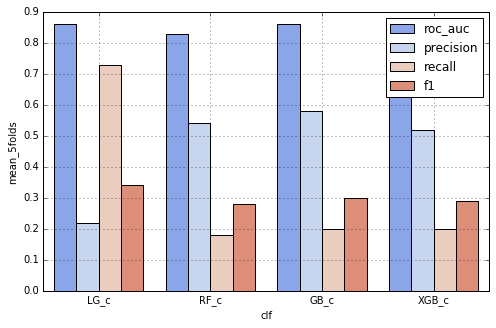

In [324]:
results_df = pd.DataFrame(results, columns=['clf','metric','mean_5folds','std_5folds'])

# 
fig,ax = plt.subplots(1,1,figsize = (8,5))
sns.barplot(results_df['clf'], y = results_df['mean_5folds'],hue=results_df['metric'],palette='coolwarm',ax=ax)
ax.legend(loc='best')
ax.grid(0.3)

Baseline Logistic Regression and GradientBoosting outmerforms other based roc auc score and f1.
Picking the right one depends on  what metric we care about - can we accept to many false positives/false negatives?
For this example - consider that we care about f1. So our choice is Logistic Regression

### Parametrs tuning

In [337]:
# init new instance of classifier
lg_c = LogisticRegression(class_weight = 'balanced', random_state = 42, max_iter = 200)

# params
C_s = np.logspace(-4,5,10)
penalties = ['l2','l1']
fit_itcp = [True, False]

# create a dictionary with params
paramgrid = {
    'C': C_s,
    'penalty': penalties,
    'fit_intercept': fit_itcp
}

# train grid
grid = GridSearchCV(lg_c, paramgrid, scoring = 'roc_auc', n_jobs = -1, cv = sfk, verbose = 10)
grid.fit(X_train, y_train)


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=True, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=200, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05]),
                         'fit_intercept': [True, False],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refi

In [370]:
lg_final = LogisticRegression(class_weight = 'balanced', random_state = 42, max_iter = 200, **grid.best_params_)

In [422]:
# adding model to pipeline 
pipe = Pipeline([
    ('Fixer', Feature3Fixer()),
    ('Imputer', SimpleImputer(strategy = 'median', add_indicator = True)),
    ('finteraction', FeatureInteraction()),
    ('CategoryTargetEncoding', TargetEncoder(cols = ['feature2',
                                                     'feature5',
                                                     'feature6',
                                                     'feature7',
                                                     'feature8',
                                                     'feature9',
                                                     'f2_f5',
                                                     'f2_f6',
                                                     'f2_f7',
                                                     'f2_f8',
                                                     'f2_f9',
                                                     'f5_f6',
                                                     'f5_f7',
                                                     'f5_f8',
                                                     'f5_f9',
                                                     'f6_f7',
                                                     'f6_f8',
                                                     'f6_f9',
                                                     'f7_f8',
                                                     'f7_f9',
                                                     'f8_f9'])),
    ('MinMaxScaler', ColumnTransformer([
        ('feature3', MinMaxScaler(copy=False), ['feature3','feature4'])
    ],
        remainder='passthrough')
    ),
    ('Imputer2', SimpleImputer(strategy = 'median')),
    ('LogisticRegression', lg_final)
])

In [423]:
# train on whole train and validate on val set
# split again to train and validation sets

In [453]:
# set features and target col
X = df_train.drop('target', axis = 1)
y = df_train['target']

# ttsplit
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

# fit pipeline
pipe.fit(X_train, y_train)

# predict train 
y_pred = pipe.predict(X_train)
y_pred_proba = pipe.predict_proba(X_train)

# predict val
y_pred_test = pipe.predict(X_val)
y_pred_proba_test = pipe.predict_proba(X_val)

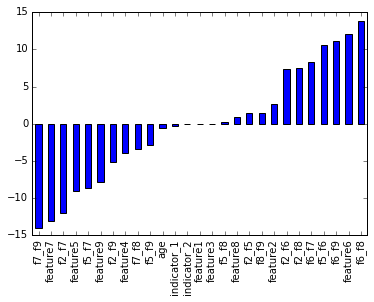

In [473]:
### Feature importance
cols_order = ['feature1', 'age', 'feature2', 'feature3', 'feature4', 'feature5',
'feature6', 'feature7', 'feature8', 'feature9', 'indicator_1','indicator_2','f2_f5',
 'f2_f6','f2_f7','f2_f8','f2_f9','f5_f6','f5_f7','f5_f8','f5_f9','f6_f7','f6_f8','f6_f9','f7_f8','f7_f9','f8_f9']

pd.Series(pipe['LogisticRegression'].coef_.reshape(-1),cols_order).sort_values().plot(kind='bar')

In [454]:
# get summaries

# roc_auc values
roc_score_train = roc_auc_score(y_train, y_pred_proba[:, 1])
roc_score_val = roc_auc_score(y_val, y_pred_proba_test[:, 1])

# f1 vals
f1_train = f1_score(y_train, y_pred)
f1_test = f1_score(y_val, y_pred_test)

print(f'Train roc_auc: {rc_score_train:.2f}')
print(f'Test roc_auc: {rc_score_val:.2f}')
print(f'Train F1: {f1_train:.2f}')
print(f'Test F1: {f1_test:.2f}')

Train roc_auc: 0.80
Test roc_auc: 0.80
Train F1: 0.28
Test F1: 0.28


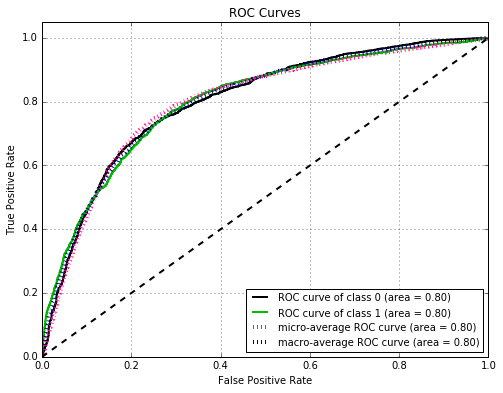

In [476]:
from scikitplot.metrics import plot_roc
f,ax = plt.subplots(1,1,figsize = (8,6))
plot_roc(y_val, y_pred_proba_test,ax = ax)
ax.grid(.5)

In [459]:
# save model
from sklearn.externals import joblib
joblib.dump(pipe,'pipelines/model_v0.pkl')

['pipelines/model_v0.pkl']

In [478]:
# load test set and apply pipeline
df_test = pd.read_csv(PATH_TEST,na_values=' ')
df_test.head()

,feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,0.023657,36,0,0.217104,5600.0,9,0,1,0,0.0
1,0.296908,32,0,0.225554,3967.0,10,0,0,0,0.0
2,0.000000,55,0,0.140762,19230.0,5,1,1,0,3.0
3,0.189247,64,2,0.313499,6570.0,12,0,1,0,0.0
4,0.021449,29,0,0.405797,2000.0,9,0,0,0,0.0


In [484]:
# make prediction for test set
y_pred_test = pipe.predict_proba(df_test)[:,1]
df_test['proba_1'] = y_pred_test

In [489]:
# save
df_test['proba_1'].to_csv('result/probas.csv')